<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [53]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
%matplotlib inline

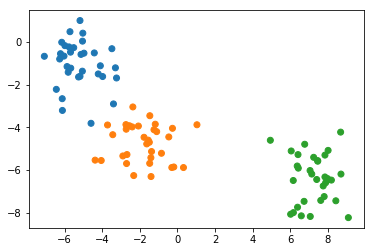

In [51]:
X,y = make_blobs(random_state=33)
fig,ax = plt.subplots(1)
X_t = X.transpose()
plt.scatter(X_t[0,:],X_t[1,:],c=np.array(["C0","C1","C2"])[y])

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)
logreg = LogisticRegression().fit(X_train,y_train)
logreg.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.92

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [72]:
logreg = LogisticRegression()
linreg = LinearRegression()
kmeans = KMeans(n_clusters = 3)
scores_logreg = cross_val_score(logreg,X,y)
scores_linreg = cross_val_score(linreg,X,y)
scores_kmeans = cross_val_score(kmeans,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logist

In [73]:
scores_default,scores_linreg,scores_kmeans

(array([0.97058824, 1.        , 0.96969697]),
 array([0.91187874, 0.9582162 , 0.94304726]),
 array([-78.9751583 , -67.85644142, -77.41132919]))

In [74]:
from sklearn.datasets import load_iris
iris = load_iris()

In [75]:
from sklearn.svm import SVC

In [76]:
X_train,X_test,y_train,y_test = train_test_split(
    iris.data,iris.target,random_state = 0
)

In [90]:
best_score = 0

for gamma in [0.0010,0.010,0.10,1.0,10,100]:
    for C in [0.0010,0.010,0.10,1.0,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_parameter = {"C":C,"gamma":gamma}



In [96]:
X_trainval,X_test,y_trainval,y_test = train_test_split(iris.data,iris.target,random_state=21)
X_train,X_validation,y_train,y_validation = train_test_split(X_trainval,y_trainval,random_state=12)


In [97]:
for gamma in [0.0010,0.010,0.10,1.0,10,100]:
    for C in [0.0010,0.010,0.10,1.0,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_validation,y_validation)
        if score > best_score:
            best_score = score
            best_parameter = {"C":C,"gamma":gamma}
best_score,best_parameter

(1.0, {'C': 100, 'gamma': 0.01})

In [98]:
svm = SVC(**best_parameter)
svm.fit(X_train,y_train).score(X_test,y_test)

0.9473684210526315

In [99]:
for gamma in [0.0010,0.010,0.10,1.0,10,100]:
    for C in [0.0010,0.010,0.10,1.0,10,100]:
        svm = SVC(gamma=gamma,C=C)
        scores = cross_val_score(svm,X_trainval,y_trainval,cv = 5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameter = {"C":C,"gamma":gamma}
best_score,best_parameter

(1.0, {'C': 100, 'gamma': 0.01})

In [100]:
svm = SVC(**best_parameter)
svm.fit(X_train,y_train).score(X_test,y_test)

0.9473684210526315

In [101]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target==9

In [102]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=9)

In [107]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(
    strategy = "most_frequent"
).fit(
    X_train,y_train
).score(
    X_test,y_test
)
dummy_majority

0.8977777777777778

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
tree = DecisionTreeClassifier(max_depth = 3)

In [159]:
pca = PCA(n_components =2).fit(X_train,y_train)

In [160]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [161]:
score_tree = tree.fit(X_train,y_train).score(X_test,y_test)
score_pca = tree.fit(X_train_pca,y_train).score(X_test_pca,y_test)
score_tree,score_pca

(0.9377777777777778, 0.9333333333333333)

In [164]:
logreg = LogisticRegression().fit(X_train,y_train)
pred_logreg= logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [155]:
X_train.shape, X_train_pca.shape

((1347, 64), (1347, 7))

In [163]:
from sklearn.metrics import confusion_matrix

In [169]:
confusion = confusion_matrix(y_test,pred_logreg)
confusion

array([[394,  10],
       [  1,  45]], dtype=int64)

ValueError: Parameter `centers` must be array-like. Got 2 instead